In [26]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly
import plotly.express as px
import matplotlib.pyplot as plt


#importamos Seaborn
import seaborn as sns
#importamos ip widget
from ipywidgets import interact_manual

In [27]:
#importacion base de datos#
df = pd.read_csv("Data/properati_tra.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
counter     

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,pileta,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2,place_name_clean
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NO,NO,NO,NO,NO,2,2.0,55.0,1127.272727,Mataderos
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NO,NO,NO,NO,NO,2,2.0,55.0,1309.090909,Mataderos
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NO,NO,NO,NO,NO,0,0.0,35.0,1828.571429,Mar del Plata Centro


In [56]:
df.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [50]:
df_dummies = pd.get_dummies(data=df,columns=['property_type','new_rooms_clean',"pileta","parrilla","jardin","gym","cochera"], drop_first=True)
df_rooms_clean  = pd.concat([df,df_dummies], axis = 1)
df_rooms_clean 

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,new_rooms_clean_24.0,new_rooms_clean_25.0,new_rooms_clean_27.0,new_rooms_clean_30.0,new_rooms_clean_32.0,pileta_SI,parrilla_SI,jardin_SI,gym_SI,cochera_SI
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,0,0,0,0,0,0,0,0,0,0
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,0,0,0,0,0,0,0,0,0,0
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,0,0,0,0,0,0,0,0,0,0
3,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,0,0,0,0,0,0,0,0,0,0
4,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,0,0,0,0,0,1,1,0,0,1
92709,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,0,0,0,0,0,1,1,1,0,1
92710,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,0,0,0,0,0,0,1,0,0,0
92711,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat',
       ...
       'new_rooms_clean_24.0', 'new_rooms_clean_25.0', 'new_rooms_clean_27.0',
       'new_rooms_clean_30.0', 'new_rooms_clean_32.0', 'pileta_SI',
       'parrilla_SI', 'jardin_SI', 'gym_SI', 'cochera_SI'],
      dtype='object', length=105)

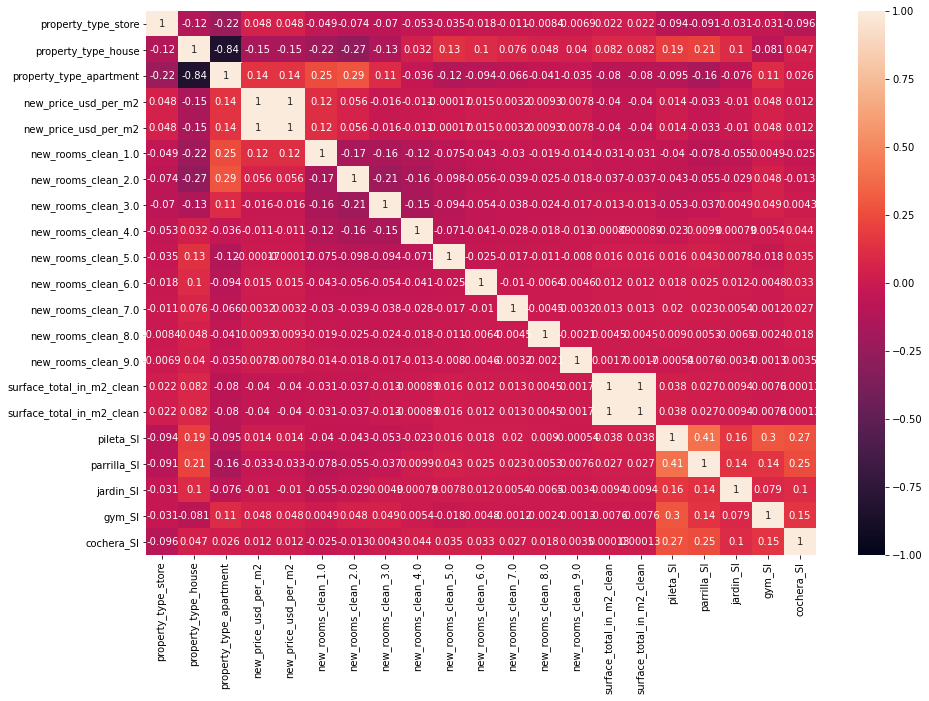

In [58]:

plt.figure(figsize = (15 , 10))
sns.heatmap(df_rooms_clean[["property_type_store","property_type_house","property_type_apartment","new_price_usd_per_m2","property_type","new_rooms_clean_1.0","new_rooms_clean_2.0","new_rooms_clean_3.0","new_rooms_clean_4.0","new_rooms_clean_5.0","new_rooms_clean_6.0","new_rooms_clean_7.0","new_rooms_clean_8.0","new_rooms_clean_9.0","surface_total_in_m2_clean","pileta_SI","parrilla_SI","jardin_SI","gym_SI","cochera_SI" ]].corr(), annot=True, vmin=-1)
#sns.heatmap(df_rooms_clean[["price_usd_per_m2"]].corrwith(df_rooms_clean), annot=True, vmin=-1)

df_rooms_clean.columns


In [30]:
df_rooms_clean.dropna(subset=["price_usd_per_m2"], inplace=True)
df_rooms_clean.corrwith(df_rooms_clean[["price_usd_per_m2"]])